# **Sentiment Analysis**

* **What is Sentiment Analysis?**

Sentiment analysis is the process of evaluating digital text to determine whether its emotional tone is positive, negative, or neutral. It is employed by companies to analyze large volumes of text data, such as emails, social media comments, and reviews, to gain insights into customer attitudes and enhance customer service.

*   **Why is Sentiment Analysis Important?**

Sentiment analysis is crucial for providing objective insights, improving products and services based on customer feedback, analyzing data at scale, and obtaining real-time results for quick decision-making. It helps businesses enhance customer service, monitor brand reputation, conduct market research, and track the performance of marketing campaigns.



*   **How Does Sentiment Analysis Work?**

Sentiment analysis utilizes natural language processing (NLP) technologies to understand text similarly to humans. The process involves preprocessing text by tokenization, lemmatization, and stop-word removal, followed by keyword analysis and sentiment scoring. There are three main approaches: rule-based, machine learning (ML), and hybrid.








In [ ]:
import string
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [ ]:
text = open('/content/sample_data/read.txt',encoding='utf-8').read()
lower_case = text.lower()

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
lower_case = text.lower()

pun = string.punctuation

clean_text = lower_case.translate(str.maketrans('','',pun))
tokenized_word = word_tokenize(clean_text,"english")


In [ ]:
final_words = []

for word in tokenized_word :
    if word not in stopwords.words("english"):
        final_words.append(word)

print("\n\n\nFinal Words :\n" )
print(final_words)




Final Words :

['honored', 'today', 'commencement', 'one', 'finest', 'universities', 'world', 'never', 'graduated', 'college', 'truth', 'told', 'closest', '’', 'ever', 'gotten', 'college', 'graduation', 'today', 'want', 'tell', 'three', 'stories', 'life', '’', 'big', 'deal', 'three', 'stories', 'related', 'story', '2005', 'stanford', 'commencement', 'coverage', 'first', 'story', 'connecting', 'dots', 'dropped', 'reed', 'college', 'first', '6', 'months', 'stayed', 'around', 'dropin', 'another', '18', 'months', 'really', 'quit', 'drop', 'started', 'born', 'biological', 'mother', 'young', 'unwed', 'college', 'graduate', 'student', 'decided', 'put', 'adoption', 'felt', 'strongly', 'adopted', 'college', 'graduates', 'everything', 'set', 'adopted', 'birth', 'lawyer', 'wife', 'except', 'popped', 'decided', 'last', 'minute', 'really', 'wanted', 'girl', 'parents', 'waiting', 'list', 'got', 'call', 'middle', 'night', 'asking', '“', 'unexpected', 'baby', 'boy', 'want', '”', 'said', '“', 'cours

In [ ]:

emosion_list1 = []
emotion_list2 = []
#list one for store word->emosion relation
#list2 store only emosion

#lets include emotion file
with open('/content/sample_data/emotions.txt','r') as file:
    for line in file:
        clear_line = line.replace("\n",'').replace(",",'').replace("'",'').strip()
        word,emotion = clear_line.split(':')
       # print("word "+ word + " "+ "Emotion : "+emotion)
        if(word in final_words):
            emosion_list1.append(word+" -> "+emotion)
            emotion_list2.append(emotion)


print("\n\n\nDetected Emosions : ")
for w in emosion_list1:
    print(w +"\n")





Detected Emosions : 
animated ->  happy

important ->  happy

loved ->  attached

lucky ->  happy

needed ->  attracted

rejected ->  alone

released ->  free

replaced ->  hated

satisfied ->  happy

trapped ->  entitled

great ->  happy

loved ->  loved

rejected ->  hated

trapped ->  entitled



In [ ]:
w = Counter(emotion_list2)
print(w)

Counter({' happy': 5, ' hated': 2, ' entitled': 2, ' attached': 1, ' attracted': 1, ' alone': 1, ' free': 1, ' loved': 1})


In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:

def sentiment_analyzer(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    print(score)
    negative = score['neg']
    positive = score['pos']
    if positive > negative :
        print("Positive Sentiment\n")
    elif negative > positive :
        print("Negative Sentiment\n")
    else :
        print("Neutral \n")

sentiment_analyzer(clean_text)


{'neg': 0.091, 'neu': 0.747, 'pos': 0.162, 'compound': 0.9996}
Positive Sentiment



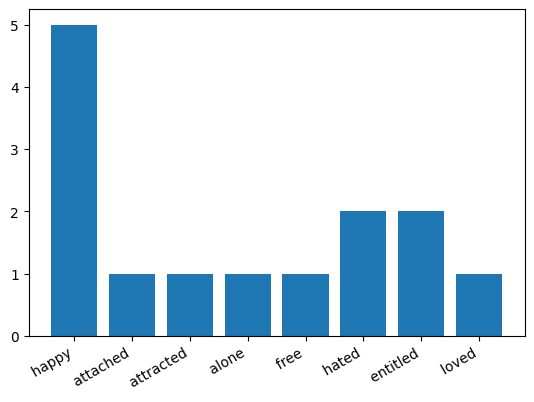

In [ ]:
fig , ax1 = plt.subplots()
ax1.bar(w.keys(),w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()